In [73]:
%load_ext autoreload 
# saving changes to code reloads them in the environment
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import sys
import funcy
from __future__ import division
import numpy as np
import scipy.optimize as spo
import pandas as pd
from collections import defaultdict
from code.gradient_descent import _gradient_descent, gradient_descent, SGD, g_error, b_error 
from code.helpers import f_gauss, d_gauss, f_bowl, d_bowl, get_lr
from code.basis_func import create_basis, create_cos_basis, BasisSearch, plotter
from code.constants import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
import sys
sys.path.append('../')

In [65]:
sys.path.append('../code')

In [66]:
# Import everything

Or you can just load the code into the environment

In [ ]:
% load code/gradient_descent.py

In [32]:
def get_n_steps(start):
    '''How long did it take gauss to converge give starting point'''
    ul, too_fast = _gradient_descent(f_gauss,
                                 deriv_func=d_gauss,
                                  init_weights=np.array([start, start]),
                                  lr=1e9, stop_crit=1e-20)
    return too_fast.w0

# Gradient Descent

## Implementation in code/gradient_descent.py

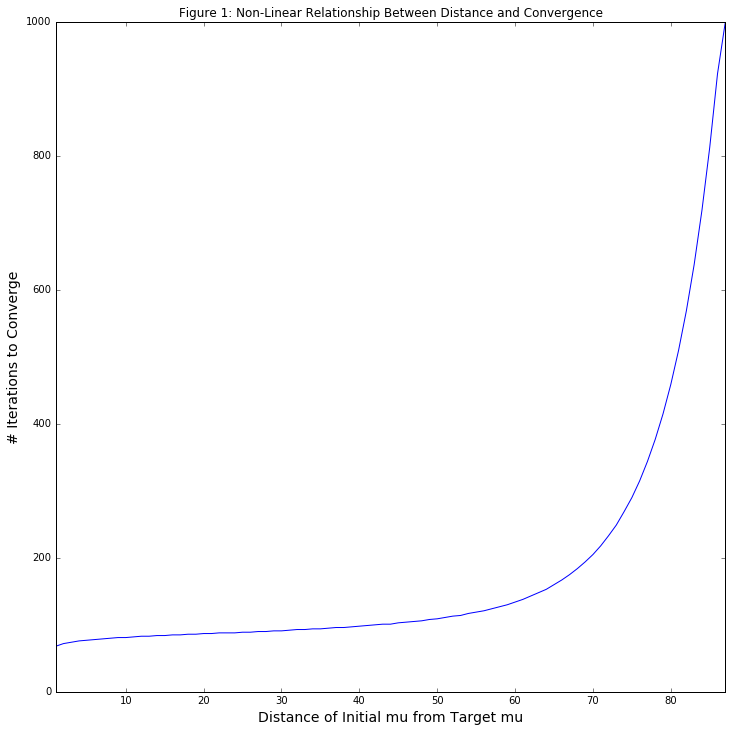

In [33]:
start_table = pd.DataFrame({'n_steps': steps.count(), 
              'error': 10 - steps.fillna(method='ffill').iloc[-1]}).rename_axis('distance')
ax = start_table[1:88].n_steps.plot(figsize=(12,12))
ax.set_ylabel('# Iterations to Converge', fontsize=14)

ax.set_xlabel('Distance of Initial mu from Target mu', fontsize=14)
ax.set_title('Figure 1: Non-Linear Relationship Between Distance and Convergence')

In [34]:
steps = pd.DataFrame({k: get_n_steps(10-k) for k in np.arange(0, 1000, 1)})

In [41]:
# bowl for different learing rates
bowl_results  = pd.Series({l: gradient_descent(f_bowl,
                                deriv_func=d_bowl,
                              init_weights=np.array([8, 8.]),
                              lr=l, stop_crit=1e-12)[0]
        for l in np.arange(0, .3, .01)}).rename_axis('lr').rename('final_weight').to_frame()

In [42]:
bowl_results

,final_weight
lr,
0.00,8.000000e+00
0.01,2.666667e+01
0.02,2.666667e+01
0.03,2.666667e+01
0.04,2.666667e+01
0.05,2.666667e+01
0.06,2.666667e+01
0.07,2.666667e+01
0.08,2.666667e+01


In [54]:

gauss_results  = pd.Series({l: gradient_descent(f_bowl,
                                deriv_func=d_bowl,
                              init_weights=np.array([9, 9.]),
                              lr=l, stop_crit=1e-12)[0]
        for l in  [1e-11, 1e-10,1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}).rename_axis('lr').rename('final_weight').to_frame()

In [55]:
gauss_results

,final_weight
lr,
1.000000e-11,9.000003
1.000000e-10,9.000026
1.000000e-09,9.000265
1.000000e-08,9.002650
1.000000e-07,9.026480
1.000000e-06,9.263024
1.000000e-05,11.460997
1.000000e-04,22.729137


##  Numerical Gradient Errors vs. Step Size

In [90]:
STEP_SIZES = [2, 1,.5, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
gauss_errors = pd.Series({h: g_error(9.99, h=h) for h in STEP_SIZES})
bowl_errors = pd.Series({h: b_error(9.99, h=h) for h in STEP_SIZES})

In [91]:
gauss_errors.idxmin()

0.001

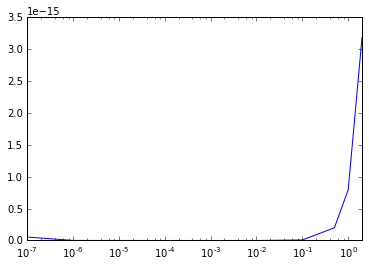

In [92]:
gauss_errors.plot(logx=True)

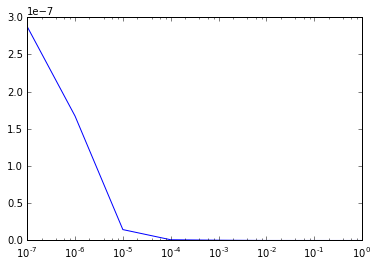

In [86]:
bowl_errors.plot(logx=True)

In [ ]:
bowl_errors

## SGD

done in 9999 steps


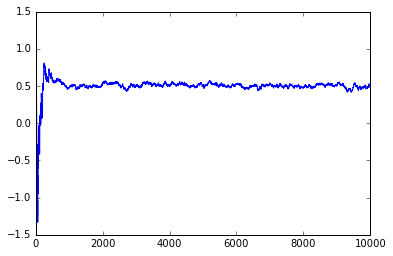

In [71]:

coef_sgd, sgd_paths = SGD(stop_crit=1e-2)
sgd_paths['w0'].plot()